# Reinforcement Learning Lab: Bandits

In this lab, you take on the role of a data scientist at **NewsNet**, a company that personalizes news recommendations. Every time a user logs in, you observe their profile (**context**) and recommend one of several articles. The user may click (**reward = 1**) or ignore (**reward = 0**).

You must learn to make better decisions over time by balancing **exploration** and **exploitation**.  
This is modeled using **bandit algorithms**.

---

## Part 1: Multi-Armed Bandits
In this part, you will start with the classical **multi-armed bandit** problem, where each article has a fixed but unknown probability of being clicked. Your goal is to learn which article performs best through trial and error.

---

## Part 2: Contextual Bandits
In the second part, you will extend the problem to **contextual bandits**, where the user’s profile (context) affects which article is most relevant. You will use the context to make more personalized and effective recommendations.


## Part 1: Multi-Armed Bandits

We use the following **environment** to simulate the news recommendation scenario.  
Each article (or *arm*) has an unknown probability of being clicked. When you recommend an article (choose an arm), the environment returns a reward of `1` (user clicks) or `0` (user ignores).  

Your goal is to learn which article performs best through interaction with this environment.


In [5]:
import numpy as np

class BernoulliBandit:
    """
    A simple environment for the multi-armed bandit problem.
    Each arm (article) has a fixed probability of giving a reward (user click).
    """

    def __init__(self, probs):
        """
        Initialize the bandit with a list of probabilities for each arm.

        Input:
            probs (list of float): Probabilities of reward for each arm.
        """
        self.probs = probs
        self.k = len(probs)

    def pull(self, arm):
        """
        Simulate pulling an arm (recommending an article).

        Input:
            arm (int): Index of the arm/article to pull.

        Output:
            reward (int): 1 if user clicks, 0 otherwise.
        """
        return int(np.random.rand() < self.probs[arm])

### Task 1 (a): Epsilon-Greedy

Now implement **epsilon-greedy** to learn the best arm. Follow the lab instructions.  
Below we provide starter code that can be used—**for the algorithm it is enough to change the marked text** (look for lines marked `TODO`).


t=    1 | Q=[0. 0. 0. 0.] | N=[0 0 0 0] | EXPLOIT | chose arm 0
t=    2 | Q=[0. 0. 0. 0.] | N=[0 0 1 0] | EXPLOIT | chose arm 0
t=    3 | Q=[0. 0. 0. 0.] | N=[1 0 1 0] | EXPLOIT | chose arm 0
t=    4 | Q=[0. 0. 0. 0.] | N=[1 1 1 0] | EXPLOIT | chose arm 0
t=    5 | Q=[0.5 0.  0.  0. ] | N=[2 1 1 0] | EXPLOIT | chose arm 0
t=    6 | Q=[0.5 0.  0.  0. ] | N=[2 2 1 0] | EXPLOIT | chose arm 0
t=    7 | Q=[0.5 0.  0.  0. ] | N=[2 3 1 0] | EXPLOIT | chose arm 0
t=    8 | Q=[0.333 0.    0.    0.   ] | N=[3 3 1 0] | EXPLOIT | chose arm 0
t=    9 | Q=[0.333 0.    0.5   0.   ] | N=[3 3 2 0] | EXPLOIT | chose arm 2
t=   10 | Q=[0.333 0.    0.5   0.   ] | N=[3 3 2 1] | EXPLOIT | chose arm 2
t=   11 | Q=[0.25 0.   0.5  0.  ] | N=[4 3 2 1] | EXPLOIT | chose arm 2
t=   12 | Q=[0.25 0.   0.5  0.  ] | N=[4 4 2 1] | EXPLOIT | chose arm 2
t=   13 | Q=[0.25 0.   0.5  0.5 ] | N=[4 4 2 2] | EXPLOIT | chose arm 2
t=   14 | Q=[0.2 0.  0.5 0.5] | N=[5 4 2 2] | EXPLOIT | chose arm 2
t=   15 | Q=[0.2   0.    0.6

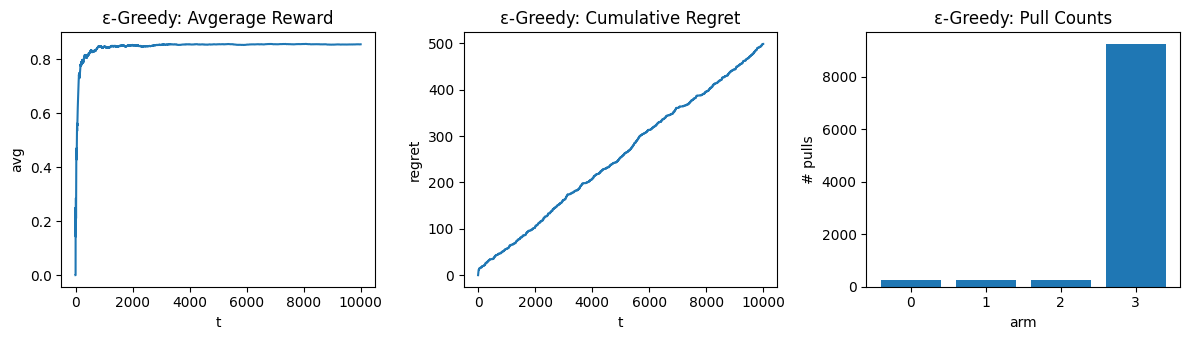

In [6]:
# Epsilon-Greedy — self-contained run function + quick test ========
import numpy as np
import matplotlib.pyplot as plt

def run_epsilon_greedy(probs, T, epsilon=0.1, seed=0):
    """
    Run epsilon-greedy for T steps on a BernoulliBandit with given probs.

    Returns:
        dict: {
          'rewards': np.array[T],
          'regrets': np.array[T],
          'actions': np.array[T],
          'Q': np.array[k],   # final value estimates
          'N': np.array[k],   # pull counts
        }
    """
    assert all(0.0 <= p <= 1.0 for p in probs), "All probabilities must be in [0, 1]"
    bandit = BernoulliBandit(probs)
    rng = np.random.default_rng(seed)

    k = len(probs)
    Q = np.zeros(k, dtype=float)   # value estimates
    N = np.zeros(k, dtype=int)     # pull counts

    rewards = np.zeros(T, dtype=int)
    regrets = np.zeros(T, dtype=float)
    actions = np.zeros(T, dtype=int)

    optimal_mean = float(np.max(probs))

    for t in range(1, T + 1):
        # ----------------------- TODO: ε-greedy selection ----------------------
        # With probability epsilon: choose a random arm.
        # Otherwise: choose the arm with the highest Q (break ties via np.argmax).

      if rng.random() < epsilon:
    # Explore: choose random arm
        arm = rng.integers(0, k)
        explore = True
      else:
    # Exploit: choose best arm based on current estimates
        arm = np.argmax(Q)
        explore = False
      if t <= 20 or t in [100, 500, 1000, 5000]:
        print(f"t={t:5d} | Q={Q.round(3)} | N={N} | {'EXPLORE' if explore else 'EXPLOIT'} | chose arm {arm}")


        # Hint: rng.random() for the coin flip; rng.integers(0, k) for random arm.
        # Hint: np.argmax(Q) for exploitation.

        arm = rng.integers(0, k)  # TEMP PLACEHOLDER — replace with ε-greedy

        # ----------------------------------------------------------------------

      r = int(bandit.pull(arm))
      rewards[t - 1] = r
      actions[t - 1] = arm
      regrets[t - 1] = optimal_mean - probs[arm]

      N[arm] += 1
      Q[arm] += (r - Q[arm]) / N[arm]

    return {"rewards": rewards, "regrets": regrets, "actions": actions, "Q": Q, "N": N}

# --- Quick single-run test / visualization for ε-greedy ---

##############################################################
###
### You can play around with these parameters:
###
probs = [0.2, 0.1, 0.5, 0.9]
T = 10000
epsilon = 0.1
seed = 123
##############################################################

out_eps = run_epsilon_greedy(probs, T, epsilon, seed)

plt.figure(figsize=(12, 3.5))
plt.subplot(1, 3, 1)
avg_reward = np.cumsum(out_eps["rewards"]) / np.arange(1, T + 1)
plt.plot(avg_reward); plt.title("ε-Greedy: Avgerage Reward"); plt.xlabel("t"); plt.ylabel("avg")

plt.subplot(1, 3, 2)
plt.plot(np.cumsum(out_eps["regrets"])); plt.title("ε-Greedy: Cumulative Regret"); plt.xlabel("t"); plt.ylabel("regret")

plt.subplot(1, 3, 3)
counts = np.bincount(out_eps["actions"], minlength=len(probs))
plt.bar(range(len(probs)), counts); plt.title("ε-Greedy: Pull Counts"); plt.xlabel("arm"); plt.ylabel("# pulls")
plt.tight_layout(); plt.show()

### Task 1 (b): UCB

Now implement **UCB** (Upper Confidence Bound) to learn the best arm. Follow the lab instructions.  
Below we provide starter code that can be used—**for the algorithm it is enough to change the marked text** (look for lines marked `TODO`).


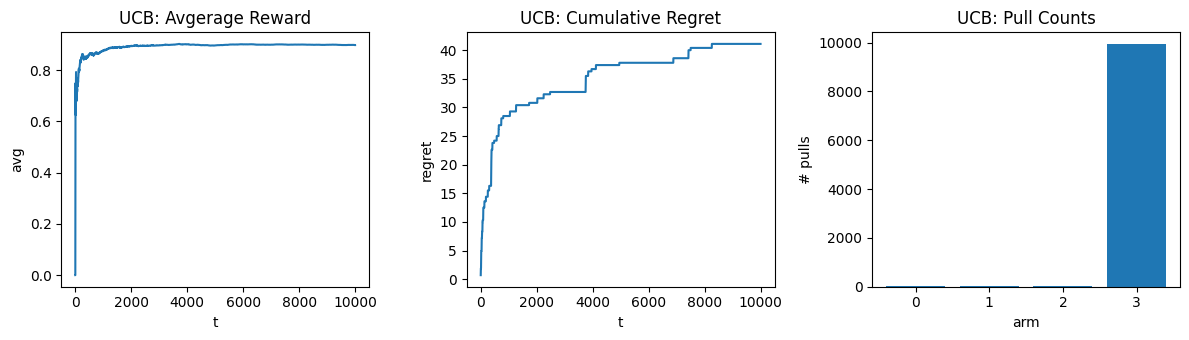

In [11]:
# UCB — self-contained run function + quick test ===================

def run_ucb(probs, T, c=1.0, seed=0):
    """
    Run Upper Confidence Bound (UCB) for T steps on a BernoulliBandit.

    Returns:
        dict: same structure as run_epsilon_greedy
    """
    assert all(0.0 <= p <= 1.0 for p in probs), "All probabilities must be in [0, 1]"
    bandit = BernoulliBandit(probs)
    rng = np.random.default_rng(seed)

    k = len(probs)
    Q = np.zeros(k, dtype=float)
    N = np.zeros(k, dtype=int)

    rewards = np.zeros(T, dtype=int)
    regrets = np.zeros(T, dtype=float)
    actions = np.zeros(T, dtype=int)

    optimal_mean = float(np.max(probs))

    for t in range(1, T + 1):
        # --------------------------- TODO: UCB selection -----------------------
        # Compute: UCB[a] = Q[a] + c * sqrt( (ln(t)) / N[a] )
        # If N[a] == 0, set UCB[a] = +inf so each arm is tried at least once.
        # Then choose the arm with the largest UCB[a].
        UCB = np.zeros(k)
        for a in range(k):
          if N[a] == 0:
            UCB[a] = np.inf  # Ensure untried arms are selected first
          else:
            UCB[a] = Q[a] + c * np.sqrt(np.log(t) / N[a])

        arm = np.argmax(UCB)
        # Hints:
        #   - Use np.inf for infinity, np.log(t) for log.
        #   - Create an array of UCB values of length k.

        # arm = rng.integers(0, k)  # TEMP PLACEHOLDER — replace with UCB rule

        # ----------------------------------------------------------------------

        r = int(bandit.pull(arm))
        rewards[t - 1] = r
        actions[t - 1] = arm
        regrets[t - 1] = optimal_mean - probs[arm]

        N[arm] += 1
        Q[arm] += (r - Q[arm]) / N[arm]

    return {"rewards": rewards, "regrets": regrets, "actions": actions, "Q": Q, "N": N}

# --- Quick single-run test / visualization for UCB ---

##############################################################
###
### You can play around with these parameters:
###
probs = [0.2, 0.1, 0.5, 0.9]
T = 10000
c=1.0
seed=123
##############################################################


out_ucb = run_ucb(probs, T, c, seed)

plt.figure(figsize=(12, 3.5))
plt.subplot(1, 3, 1)
avg_reward = np.cumsum(out_ucb["rewards"]) / np.arange(1, T + 1)
plt.plot(avg_reward); plt.title("UCB: Avgerage Reward"); plt.xlabel("t"); plt.ylabel("avg")

plt.subplot(1, 3, 2)
plt.plot(np.cumsum(out_ucb["regrets"])); plt.title("UCB: Cumulative Regret"); plt.xlabel("t"); plt.ylabel("regret")

plt.subplot(1, 3, 3)
counts = np.bincount(out_ucb["actions"], minlength=len(probs))
plt.bar(range(len(probs)), counts); plt.title("UCB: Pull Counts"); plt.xlabel("arm"); plt.ylabel("# pulls")
plt.tight_layout(); plt.show()


## Part 2: Contextual Bandits

### Part 2: Contextual Bandits

This part extends the bandit problem to include **contextual information** such as user preferences and age.

Below are three code cells corresponding to this part:

1. **Environment and Policies** – sets up the contextual bandit environment and the algorithms described in the lab instructions (Random, Contextual ε-Greedy, and LinUCB).  
2. **Long-Run Simulation** – runs all three algorithms and plots the **Average Reward** and **Cumulative Regret** over time, showing how each learns to recommend better articles.  
3. **Illustrative Simulation** – shows detailed examples of the first 6 interactions and, after 10,000 learning steps, how the recommendations have improved based on what each algorithm has learned.


In [12]:
# === Cell 1: Environment and Policies =================================
import numpy as np

class ContextualNewsEnv:
    """
    Contextual bandit for news with interpretable features, incl. age.
    Reward ~ Bernoulli(sigmoid(theta[a] · x)).
    """
    def __init__(self, seed=0):
        self.rng = np.random.default_rng(seed)
        # 6 human-readable features (last one is age_z = (age - 40)/15)
        self.feature_names = [
            "likes_politics",
            "sports_fan",
            "techie",
            "mobile_user",
            "morning_reader",
            "age_z",             # standardized age (0 ≈ 40y, +1 ≈ 55y, -1 ≈ 25y)
        ]
        self.d = len(self.feature_names)
        self.arm_names = ["Politics", "Sports", "Tech", "Lifestyle"]
        self.k = len(self.arm_names)

        # True arm parameters (rows=arms, cols=features); include age effects
        self.theta = np.array([
            [ 1.6,  0.2,  0.1,  0.2,  0.7,  0.4],   # Politics prefers older & morning readers
            [ 0.1,  1.8,  0.1,  0.7,  0.2, -0.1],   # Sports slightly skew younger/mobile
            [ 0.0,  0.1,  1.9, -0.1, -0.2, -0.2],   # Tech slightly skew younger
            [ 0.3,  0.2,  0.2,  1.0,  0.8,  0.0],   # Lifestyle mostly device/time driven
        ], dtype=float)

    @staticmethod
    def _sigmoid(z):
        return 1.0 / (1.0 + np.exp(-z))

    def _sample_age_z(self):
        """
        Sample an age in years, then standardize:
            age_z = (age - 40) / 15
        (≈ N(40, 12^2) clipped to [18, 80] for realism)
        """
        age = float(np.clip(self.rng.normal(40, 12), 18, 80))
        return (age - 40.0) / 15.0

    def sample_context(self):
        """
        Sample an interpretable user:
        pick a coarse segment, then add noise; append standardized age.
        """
        seg = self.rng.choice(["politics", "sports", "tech", "on_the_go", "morning_person"])
        x = np.zeros(self.d)
        if seg == "politics":
            core = np.array([1.6, 0.2, 0.2, 0.3, 0.9])
        elif seg == "sports":
            core = np.array([0.2, 1.8, 0.2, 1.0, 0.3])
        elif seg == "tech":
            core = np.array([0.2, 0.2, 1.9, 0.3, 0.2])
        elif seg == "on_the_go":
            core = np.array([0.4, 0.9, 0.5, 1.8, 0.7])
        else:  # morning_person
            core = np.array([0.8, 0.3, 0.2, 0.6, 1.9])
        core = core + self.rng.normal(0, 0.2, size=5)
        age_z = self._sample_age_z()
        x[:5] = core
        x[5] = age_z
        return x

    def click_prob(self, arm, x):
        return float(self._sigmoid(self.theta[arm] @ x))

    def click(self, arm, x):
        """Return (reward, true_click_prob)."""
        p = self.click_prob(arm, x)
        r = int(self.rng.random() < p)
        return r, p


# ---- Policies ---------------------------------------------------------------
class Policy:
    def select(self, x: np.ndarray) -> int: raise NotImplementedError
    def update(self, arm: int, x: np.ndarray, r: int): pass

class RandomPolicy(Policy):
    def __init__(self, k, seed=0):
        self.k = k
        self.rng = np.random.default_rng(seed)
    def select(self, x): return int(self.rng.integers(0, self.k))

class ContextualEpsGreedy(Policy):
    """Linear model per arm; ε-greedy on θ̂_a · x with random tie-breaking."""
    def __init__(self, k, d, epsilon=0.1, seed=0):
        self.eps = float(epsilon)
        self.Q = np.zeros((k, d))
        self.N = np.zeros(k, dtype=int)
        self.rng = np.random.default_rng(seed)
    def select(self, x):
        if self.rng.random() < self.eps:
            return int(self.rng.integers(0, self.Q.shape[0]))
        scores = self.Q @ x
        best = np.flatnonzero(scores == np.max(scores))
        return int(self.rng.choice(best))
    def update(self, arm, x, r):
        self.N[arm] += 1
        pred = self.Q[arm] @ x
        self.Q[arm] += (r - pred) * x / self.N[arm]

class LinUCB(Policy):
    """Per-arm ridge regression + UCB: θ̂_a^T x + α sqrt(x^T A_a^{-1} x)."""
    def __init__(self, k, d, alpha=1.0, lambda_=1.0):
        self.k, self.d = k, d
        self.alpha = float(alpha)
        self.A = [lambda_ * np.eye(d) for _ in range(k)]
        self.b = [np.zeros(d) for _ in range(k)]
    def select(self, x):
        vals = np.empty(self.k)
        for a in range(self.k):
            A_inv_x = np.linalg.solve(self.A[a], x)
            theta_hat = np.linalg.solve(self.A[a], self.b[a])
            pred = theta_hat @ x
            bonus = self.alpha * np.sqrt(x @ A_inv_x)
            vals[a] = pred + bonus
        return int(np.argmax(vals))
    def update(self, arm, x, r):
        self.A[arm] += np.outer(x, x)
        self.b[arm] += r * x


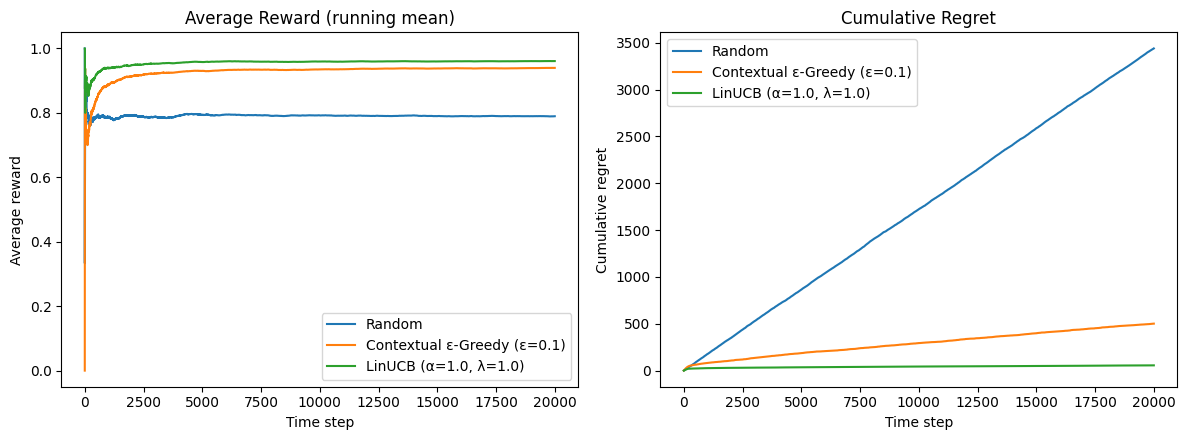

Totals over T steps
  Random:              reward=15792, final avg=0.790, cum regret=3440.2
  Contextual ε-Greedy: reward=18793, final avg=0.940, cum regret=501.6
  LinUCB:              reward=19216, final avg=0.961, cum regret=56.1


In [ ]:
# === Cell 2: Long-run simulation with Average Reward & Cumulative Regret =====
import numpy as np
import matplotlib.pyplot as plt

# ---- Parameters you can play with -------------------------------------------
T = 20000         # horizon (longer run for clearer curves)
epsilon = 0.1     # contextual ε-greedy exploration rate
alpha = 1.0       # LinUCB exploration bonus
lambda_ = 1.0     # LinUCB regularization
seed = 7          # master seed for reproducibility

# ---- Generate one fixed context sequence (fair comparison across policies) ---
env_for_contexts = ContextualNewsEnv(seed=seed)
contexts = [env_for_contexts.sample_context() for _ in range(T)]

# ---- Helper to run a policy on the fixed context sequence -------------------
def run_on_contexts(policy, env_seed, contexts):
    env = ContextualNewsEnv(seed=env_seed)  # fresh env so θ and RNG are consistent
    rewards = np.zeros(len(contexts), dtype=int)
    inst_regret = np.zeros(len(contexts), dtype=float)
    for t, x in enumerate(contexts):
        arm = policy.select(x)
        r, p_sel = env.click(arm, x)
        rewards[t] = r
        # compute instantaneous regret in *expected* terms:
        # p*(x) - p_sel(x), where p*(x)=max_a sigmoid(θ_a · x)
        true_scores = env.theta @ x
        p_star = 1.0 / (1.0 + np.exp(-np.max(true_scores)))
        inst_regret[t] = p_star - p_sel
        policy.update(arm, x, r)
    return rewards, inst_regret

# ---- Run Random, Contextual ε-Greedy, LinUCB --------------------------------
rng = np.random.default_rng(seed)
k = ContextualNewsEnv(seed=seed).k
d = ContextualNewsEnv(seed=seed).d

rewards_rand, regret_rand = run_on_contexts(RandomPolicy(k, seed=seed), seed, contexts)
rewards_eps,  regret_eps  = run_on_contexts(ContextualEpsGreedy(k, d, epsilon, seed), seed, contexts)
rewards_ucb,  regret_ucb  = run_on_contexts(LinUCB(k, d, alpha=alpha, lambda_=lambda_), seed, contexts)

# ---- Curves: running average reward & cumulative regret ---------------------
avg_rand = np.cumsum(rewards_rand) / np.arange(1, T+1)
avg_eps  = np.cumsum(rewards_eps)  / np.arange(1, T+1)
avg_ucb  = np.cumsum(rewards_ucb)  / np.arange(1, T+1)

cumreg_rand = np.cumsum(regret_rand)
cumreg_eps  = np.cumsum(regret_eps)
cumreg_ucb  = np.cumsum(regret_ucb)

# ---- Plot -------------------------------------------------------------------
plt.figure(figsize=(12,4.5))

plt.subplot(1,2,1)
plt.plot(avg_rand, label="Random")
plt.plot(avg_eps,  label=f"Contextual ε-Greedy (ε={epsilon})")
plt.plot(avg_ucb,  label=f"LinUCB (α={alpha}, λ={lambda_})")
plt.title("Average Reward (running mean)")
plt.xlabel("Time step"); plt.ylabel("Average reward"); plt.legend()

plt.subplot(1,2,2)
plt.plot(cumreg_rand, label="Random")
plt.plot(cumreg_eps,  label=f"Contextual ε-Greedy (ε={epsilon})")
plt.plot(cumreg_ucb,  label=f"LinUCB (α={alpha}, λ={lambda_})")
plt.title("Cumulative Regret")
plt.xlabel("Time step"); plt.ylabel("Cumulative regret"); plt.legend()

plt.tight_layout()
plt.show()

# ---- Quick totals ------------------------------------------------------------
print("Totals over T steps")
print(f"  Random:              reward={rewards_rand.sum():5d}, final avg={avg_rand[-1]:.3f}, cum regret={cumreg_rand[-1]:.1f}")
print(f"  Contextual ε-Greedy: reward={rewards_eps.sum():5d}, final avg={avg_eps[-1]:.3f}, cum regret={cumreg_eps[-1]:.1f}")
print(f"  LinUCB:              reward={rewards_ucb.sum():5d}, final avg={avg_ucb[-1]:.3f}, cum regret={cumreg_ucb[-1]:.1f}")


In [13]:
# === Cell 3: Before vs After Learning from 10,000 Samples ====================
import numpy as np

# --- Helpers (pretty printing + per-step explanation) -------------------------
def _fmt_kv(names, values):
    return ", ".join(f"{n}={v:.2f}" for n, v in zip(names, values))

def _explain_step(env, policy, x, label, show_reason=True):
    arm_names = env.arm_names
    k = env.k

    # Reasoning for each policy (before selecting)
    reasoning = ""
    if show_reason:
        if isinstance(policy, ContextualEpsGreedy):
            scores = policy.Q @ x
            max_val = np.max(scores)
            best = np.flatnonzero(scores == max_val)
            reasoning = "scores: [" + ", ".join(f"{arm_names[a]}={scores[a]:.3f}" for a in range(k)) + "]"
            if len(best) > 1:
                reasoning += f" | tie among: {', '.join(arm_names[a] for a in best)}"
        elif isinstance(policy, LinUCB):
            parts = []
            for a in range(k):
                A_inv_x = np.linalg.solve(policy.A[a], x)
                theta_hat = np.linalg.solve(policy.A[a], policy.b[a])
                pred = float(theta_hat @ x)
                bonus = float(policy.alpha * np.sqrt(x @ A_inv_x))
                parts.append(f"{arm_names[a]}={pred:.3f}+{bonus:.3f}={pred+bonus:.3f}")
            reasoning = "pred+bonus=UCB: [" + ", ".join(parts) + "]"
        else:
            reasoning = "Random policy (no scoring)."

    # Select, observe, update
    arm = policy.select(x)
    r, p = env.click(arm, x)
    policy.update(arm, x, r)

    # Bayes-optimal (for teaching/inspection only)
    true_scores = env.theta @ x
    best_true = int(np.argmax(true_scores))
    p_best = 1.0 / (1.0 + np.exp(-true_scores[best_true]))

    print(f"[{label:<10}] picked={env.arm_names[arm]:10s} | p(click)={p:.2f} | "
          f"clicked? {'YES' if r==1 else 'no '} | true best={env.arm_names[best_true]} (p*={p_best:.2f})")
    if show_reason and reasoning:
        print(f"            {reasoning}")

def walkthrough_before_after_with_random(
    pre_steps=6, train_T=10000, post_steps=6,
    epsilon=0.1, alpha=1.0, lambda_=1.0, seed=7
):
    # 1) Fixed contexts for fair comparison (same for all policies & phases)
    ctx_gen = ContextualNewsEnv(seed=seed)
    pre_contexts   = [ctx_gen.sample_context() for _ in range(pre_steps)]
    train_contexts = [ctx_gen.sample_context() for _ in range(train_T)]
    post_contexts  = [ctx_gen.sample_context() for _ in range(post_steps)]

    # 2) Independent envs (same θ, since same seed) for each policy & phase
    env_rand_pre   = ContextualNewsEnv(seed=seed)
    env_eps_pre    = ContextualNewsEnv(seed=seed)
    env_ucb_pre    = ContextualNewsEnv(seed=seed)

    env_rand_post  = ContextualNewsEnv(seed=seed)
    env_eps_train  = ContextualNewsEnv(seed=seed)
    env_ucb_train  = ContextualNewsEnv(seed=seed)
    env_eps_post   = ContextualNewsEnv(seed=seed)
    env_ucb_post   = ContextualNewsEnv(seed=seed)

    # 3) Policies (Random has no learning; ε-Greedy & LinUCB start from scratch)
    rand_pre  = RandomPolicy(k=env_rand_pre.k, seed=seed)
    eps       = ContextualEpsGreedy(k=env_eps_pre.k, d=env_eps_pre.d, epsilon=epsilon, seed=seed)
    ucb       = LinUCB(k=env_ucb_pre.k, d=env_ucb_pre.d, alpha=alpha, lambda_=lambda_)

    # --- BEFORE LEARNING: first N steps --------------------------------------
    print("=== BEFORE LEARNING (first 6 steps) ===")
    for t, x in enumerate(pre_contexts, 1):
        print(f"\nStep {t} context: {_fmt_kv(env_eps_pre.feature_names, x)}")
        _explain_step(env_rand_pre, rand_pre, x, label="Random")
        _explain_step(env_eps_pre,  eps,     x, label="ε-Greedy")
        _explain_step(env_ucb_pre,  ucb,     x, label="LinUCB")

    # --- TRAIN: 10,000 online rounds for ε-Greedy and LinUCB -----------------
    for x in train_contexts:
        # ε-Greedy training
        arm = eps.select(x)
        r, _ = env_eps_train.click(arm, x)
        eps.update(arm, x, r)
        # LinUCB training
        arm = ucb.select(x)
        r, _ = env_ucb_train.click(arm, x)
        ucb.update(arm, x, r)

    # Fresh Random for post phase (still stateless, no training)
    rand_post = RandomPolicy(k=env_rand_post.k, seed=seed)

    # --- AFTER LEARNING FROM 10,000 SAMPLES: next N steps --------------------
    print("\n=== AFTER LEARNING FROM 10,000 SAMPLES (next 6 steps) ===")
    for t, x in enumerate(post_contexts, 1):
        print(f"\nStep {t} context: {_fmt_kv(env_eps_post.feature_names, x)}")
        _explain_step(env_rand_post, rand_post, x, label="Random")
        _explain_step(env_eps_post,  eps,       x, label="ε-Greedy")
        _explain_step(env_ucb_post,  ucb,       x, label="LinUCB")

# Run the demonstration
walkthrough_before_after_with_random(
    pre_steps=6, train_T=10000, post_steps=6,
    epsilon=0.1, alpha=1.0, lambda_=1.0, seed=7
)



=== BEFORE LEARNING (first 6 steps) ===

Step 1 context: likes_politics=0.86, sports_fan=0.25, techie=0.02, mobile_user=0.51, morning_reader=1.70, age_z=0.05
[Random    ] picked=Lifestyle  | p(click)=0.90 | clicked? YES | true best=Politics (p*=0.94)
            Random policy (no scoring).
[ε-Greedy  ] picked=Tech       | p(click)=0.42 | clicked? no  | true best=Politics (p*=0.94)
            scores: [Politics=0.000, Sports=0.000, Tech=0.000, Lifestyle=0.000] | tie among: Politics, Sports, Tech, Lifestyle
[LinUCB    ] picked=Politics   | p(click)=0.94 | clicked? YES | true best=Politics (p*=0.94)
            pred+bonus=UCB: [Politics=0.000+1.989=1.989, Sports=0.000+1.989=1.989, Tech=0.000+1.989=1.989, Lifestyle=0.000+1.989=1.989]

Step 2 context: likes_politics=0.67, sports_fan=0.80, techie=0.38, mobile_user=1.90, morning_reader=0.77, age_z=0.08
[Random    ] picked=Tech       | p(click)=0.61 | clicked? no  | true best=Sports (p*=0.95)
            Random policy (no scoring).
[ε-Greedy  